# Credit Information Learning Assignment
### Question 1: Confirmation of the content of the competition

- What to learn and what to predict:
Use a variety of alternative data including telco and transactional information to predict the client repayment abilities.
- What kind of file to create and submit to kaggle:
for each parameter in the test set, you must predict probability for the target variable.
- What kind of index value will the submitted work be evaluated by?:
Area under the ROC curve between the predicted probability and the observed target.

In [1]:
# Load data
import pandas as pd
import numpy as np
application_data = pd.read_csv('application_train.csv')
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# create a baseline model
# for simplicity i will use columns that have integer/float numbers and have no missing values
# I will use CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,CNT_FAM_MEMBERS for exploratory variable X
application_data_model = application_data[['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT']]
application_data_model

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT
0,1,0,202500.0,406597.5
1,0,0,270000.0,1293502.5
2,0,0,67500.0,135000.0
3,0,0,135000.0,312682.5
4,0,0,121500.0,513000.0
...,...,...,...,...
307506,0,0,157500.0,254700.0
307507,0,0,72000.0,269550.0
307508,0,0,153000.0,677664.0
307509,1,0,171000.0,370107.0


In [5]:
# percentage of missing values
total = application_data_model.isnull().sum().sort_values(ascending=False)
percent =  (application_data_model.isnull().sum() / application_data_model.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','missing_ratio'])
missing_data

,Total,missing_ratio
TARGET,0,0.0
CNT_CHILDREN,0,0.0
AMT_INCOME_TOTAL,0,0.0
AMT_CREDIT,0,0.0


In [ ]:
# no missing values in our sample

### Question 2: Learning and Verification

In [8]:
# create explanatory data X
application_data_modelx = application_data_model.drop('TARGET', axis = 'columns')
X = application_data_modelx.to_numpy()# convert X to ndarray
print(X.shape)

(307511, 3)


In [10]:
# creating objective variable y
application_data_modely = application_data_model['TARGET']
y = application_data_modely.to_numpy() # convert y to ndarray
print(y.shape)

(307511,)


In [11]:
# splitting data into training and validation data(75% training and 25% testing)
from sklearn.model_selection import train_test_split #splitting module
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.25)


In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(230633, 3)
(76878, 3)
(230633,)
(76878,)


In [13]:
# Preprocess data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
print(scaler)


StandardScaler()


In [14]:
# assigning X_train and X_test to standardized value
X_train = scaler.transform(X_train )
X_test = scaler.transform(X_test)

In [24]:
# I will use nearest neighbours to learn the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5) # 5 is also the default
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

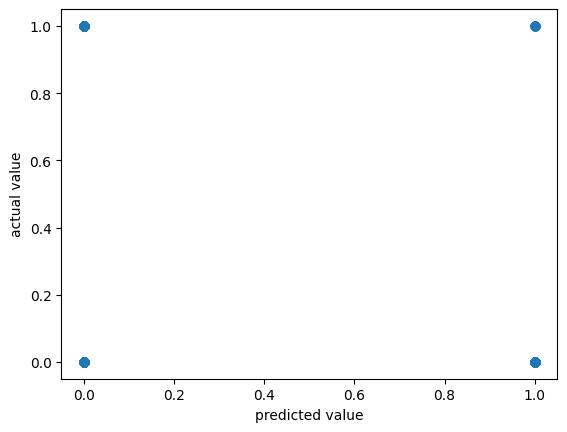

In [32]:
# scatter plot of actual value and predicted value
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

In [23]:
# I will use SVM to learn the model
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [30]:
y_preds = svm_model.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

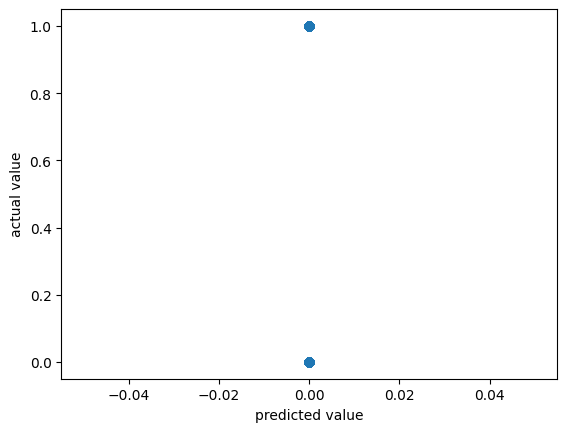

In [31]:
# scatter plot of actual value and predicted value
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_preds, y_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

In [33]:
# using linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
y_predl = lr.predict(X_test)
y_predl

array([0.06568473, 0.08483927, 0.08769507, ..., 0.06272067, 0.07137415,
       0.06673384])

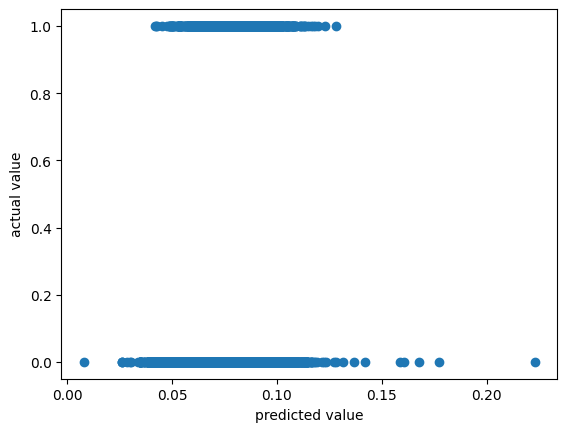

In [35]:
# scatter plot of actual value and predicted value
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_predl, y_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

In [ ]:
# I will use linear regression since its has more detail


### Problem 4: Estimation for test data

In [37]:
# submission of data in kaggle should be of the following format(SK_ID_CURR, TARGET)
target = pd.DataFrame(y_predl, columns=['TARGET'])
target

,TARGET
0,0.065685
1,0.084839
2,0.087695
3,0.077103
4,0.083360
...,...
76873,0.079256
76874,0.084302
76875,0.062721
76876,0.071374


In [42]:
sk_id_curr = application_data[['SK_ID_CURR']]
sk_id_curr

,SK_ID_CURR
0,100002
1,100003
2,100004
3,100006
4,100007
...,...
307506,456251
307507,456252
307508,456253
307509,456254


In [48]:
submission_file = pd.concat([sk_id_curr,target])
submission_file

,SK_ID_CURR,TARGET
0,100002.0,NaN
1,100003.0,NaN
2,100004.0,NaN
3,100006.0,NaN
4,100007.0,NaN
...,...,...
76873,NaN,0.079256
76874,NaN,0.084302
76875,NaN,0.062721
76876,NaN,0.071374


### Problem 4: Fearure quantity Engineering

In [49]:
# use all possible features first(pattern 1)
# create explanatory data X
application_data = application_data.drop('TARGET', axis = 'columns')
X = application_data.to_numpy()# convert X to ndarray
print(X.shape)

(307511, 121)


In [ ]:
# y remains the same

In [50]:
# splitting data into training and validation data(75% training and 25% testing)
from sklearn.model_selection import train_test_split #splitting module
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.25)


In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(230633, 121)
(76878, 121)
(230633,)
(76878,)


In [52]:
# Preprocess data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
print(scaler)


ValueError: could not convert string to float: 'Cash loans'

In [54]:
# from the error above its clear we need to choose float values only and remove string values
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 283.9+ MB


In [76]:
# there are 16 object/string types we need to remove from the data
application_num_data = application_data.select_dtypes(exclude=['object'])
application_num_data

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# check for NAN Values
check_nan = application_num_data.isnull().values.any()
print(check_nan)

True


In [72]:
# fill all NAN values with zeroes
application_num_data1 = application_num_data.fillna(0)

In [78]:
X = application_num_data1.to_numpy() # assign X to new numerical only data

In [79]:
# splitting data into training and validation data(75% training and 25% testing)
from sklearn.model_selection import train_test_split #splitting module
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.25)


In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(230633, 105)
(76878, 105)
(230633,)
(76878,)


In [81]:
# lets Preprocess the data again
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
print(scaler)


StandardScaler()


In [82]:
# assigning X_train and X_test to standardized value
X_train = scaler.transform(X_train )
X_test = scaler.transform(X_test)

In [83]:
# using linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [84]:
y_predl = lr.predict(X_test)
y_predl

array([0.13747113, 0.15839609, 0.16872999, ..., 0.11565776, 0.02728398,
       0.07498387])

In [90]:
#precision score
from sklearn.metrics import max_error
max_error(y_test, y_predl) # for precision score best value is 1 worst value is 0

1.0786916748407416

In [ ]:
# since the best value is 0.0 it shows this model has a lot of errors.
# we took all numerical feature values and converted all NAN values to zero

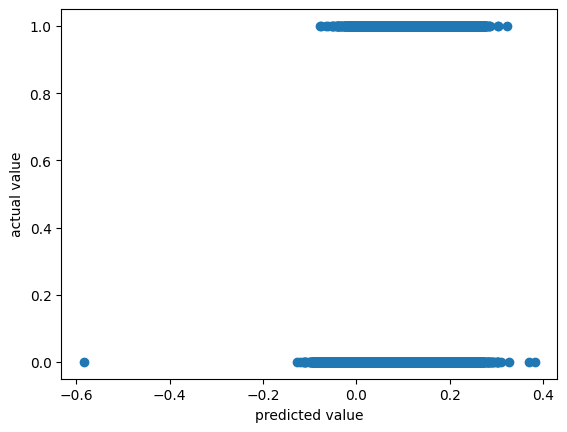

In [91]:
# scatter plot of actual value and predicted value
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_predl, y_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()